In [63]:
##Libraries
import numpy as np
import matplotlib.pyplot as plt

This code is just a stock and flow of the markets

In [64]:
def market_eq(
    ret_stock, md_stock, nc_stock, md_retirement_rate,
        ret_retirement_rate
):
    """
    This code will demonstate how equipment flows between markets. There are three different  markets each represented as a stock in this dynamic system. First is Market Driven - this market is a traditional turnover based market. 
    for the competition group we are modeling we will assume all conditions have the same EUL and turnover at 1/EUL rate. 
    The second market is Retrofit driven - This market will pull from the entire population stock evenly
    In this example we are ignoring the age of the equipment over time so the Retrofit market process is just a percentage of the entire stock (based on cost effectiveness) but for now we will just assume a 2 percent retrofit rate.
    The third market is New Construction - this market will be based on new additions to the stock. it is a distrupter that the closed dynmaic system does not effect overtime but does effect they other stocks
    In this example we are assuming a fixed number of new construction units per year but this could be a time series input.
    """
    # New construction Stock input for this time step
    nc_stock

    # Total stock before inflows
    total_stock = md_stock + ret_stock

    # Retirement flows
    md_retirement_flow = md_retirement_rate * total_stock 
    ret_retirement_flow =  ret_retirement_rate * total_stock

    # Outflows (retirements) 
    out_md = -md_retirement_flow 
    out_ret = -ret_retirement_flow 
    out_total = out_md + out_ret

    # Inflows (adoptions + new construction)
    in_md = total_stock/10  # Assume 10 year EUL, So we assume 1/10 of the retired stock goes to MD market  
    in_ret = total_stock*.9  # Assume all new construction stock goes into our main retrofit market and retired stock(md) WHich is stock that recently got upgraded goes back into our main stock pile Retrofit market
    in_total = nc_stock + in_md + in_ret


    # The change - Euler differentials
    d_md_dt = in_md + (out_md)
    d_ret_dt = in_ret + (out_ret)
    d_total_dt =  in_md + in_ret + (out_total)

    flows = {
        "md_flow": d_md_dt,
        "ret_flow": d_ret_dt,
        "total_flow": d_total_dt,

        "md_inflow": in_md,
        "ret_inflow": in_ret,

        "md_out": out_md,
        "ret_out": out_ret,

        "md_retirement_flow": md_retirement_flow,
        "ret_retirement_flow": ret_retirement_flow,
        "total_stock": total_stock
        
    }

    return d_md_dt, d_ret_dt, d_total_dt, flows

   





In [65]:
# initalization and Parameters
total_years = 20
dt = 1/12
time = np.arange(0, total_years, dt)
n = len(time)

#rates
ret_retirement_rate = 0.02
md_retirement_rate = 1 #right now MD is already the 1/10th of the retrofit market

#initial Populations
initial_nc_stock = 10  # new construction per year (can be array for time-varying)
total_stock = 1000

# Initialize stocks
md_stock = np.zeros(n)
ret_stock = np.zeros(n)
nc_stock = np.zeros(n)

# Initial allocation of stock
#this example assumes EUL of the competition group is 10 years therefore the flow into MD is 1/10 
md_stock[0] = total_stock * 0.1
ret_stock[0] = total_stock * 0.9
nc_stock[0] = initial_nc_stock  # Set initial value

# Set new construction to 10 for all time steps
nc_stock[:] = 10

# Initialize flow arrays for plotting
md_flow_arr = np.zeros(n)
ret_flow_arr = np.zeros(n)
nc_flow_arr = np.zeros(n)

Retirement_Flow_arr = np.zeros(n)
Baseline_Adoption_Flow_arr = np.zeros(n)
total_flow_arr = np.zeros(n)
md_inflow_arr = np.zeros(n)
ret_inflow_arr = np.zeros(n)
md_out_arr = np.zeros(n)
ret_out_arr = np.zeros(n)
md_retirement_flow_arr = np.zeros(n)
ret_retirement_flow_arr = np.zeros(n)
total_stock_arr = np.zeros(n)
   

In [66]:
# Euler Integration Loop
for t in range(1, n):
    d_md_dt, d_ret_dt, d_total_dt, flows = market_eq(
        ret_stock[t-1],
        md_stock[t-1],
        nc_stock[t-1],
        md_retirement_rate,
        ret_retirement_rate
    )

    # Euler integration
    md_stock[t] = md_stock[t-1] + d_md_dt
    ret_stock[t] = ret_stock[t-1] + d_ret_dt

    # Enforce non-negativity
    md_stock[t] = max(md_stock[t], 0.0)
    ret_stock[t] = max(ret_stock[t], 0.0)



        # Log flows for plotting
    Retirement_Flow_arr[t] = flows["md_flow"]
    Baseline_Adoption_Flow_arr[t] = flows["ret_flow"]
    total_flow_arr[t] = flows["total_flow"]
    md_inflow_arr[t] = flows["md_inflow"]
    ret_inflow_arr[t] = flows["ret_inflow"]
    md_out_arr[t] = flows["md_out"]
    ret_out_arr[t] = flows["ret_out"]
    md_retirement_flow_arr[t] = flows["md_retirement_flow"]
    ret_retirement_flow_arr[t] = flows["ret_retirement_flow"]
    total_stock_arr[t] = flows["total_stock"]


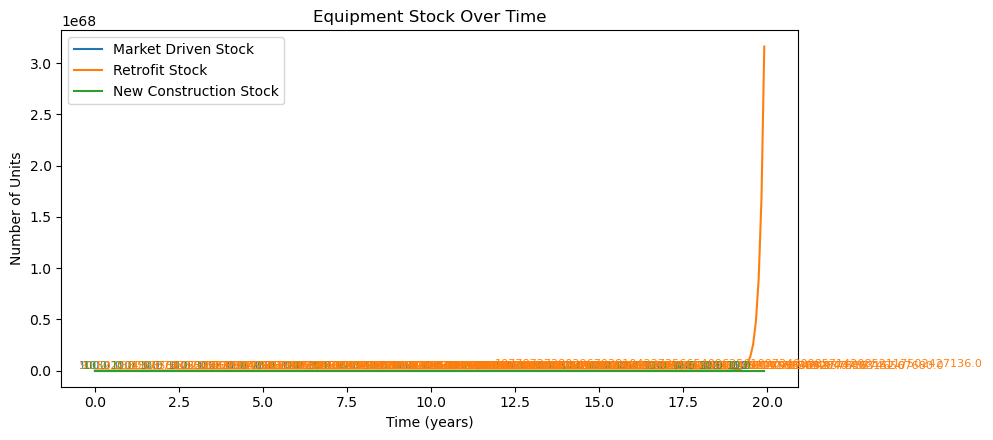

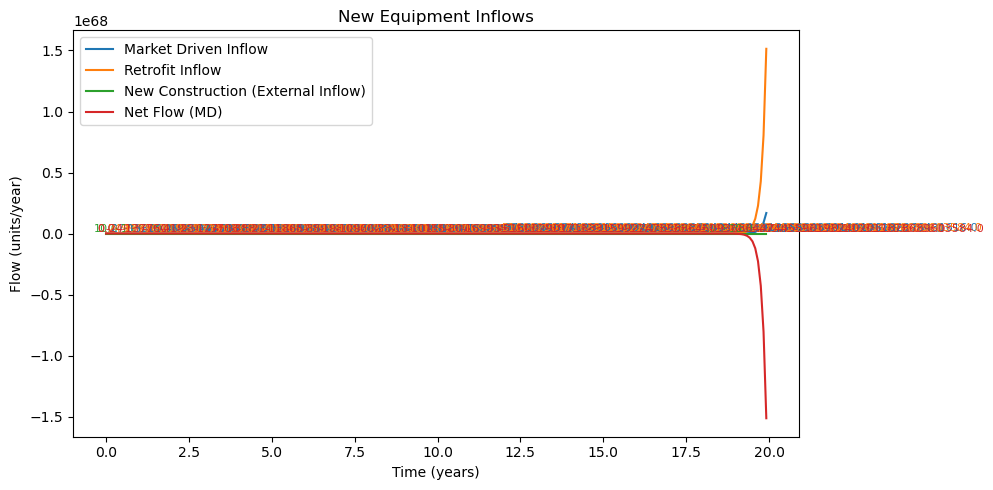

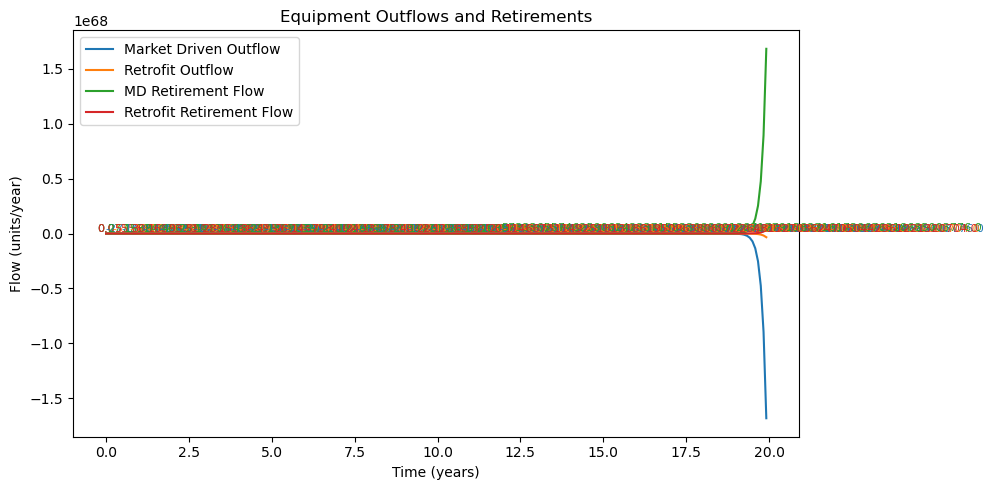

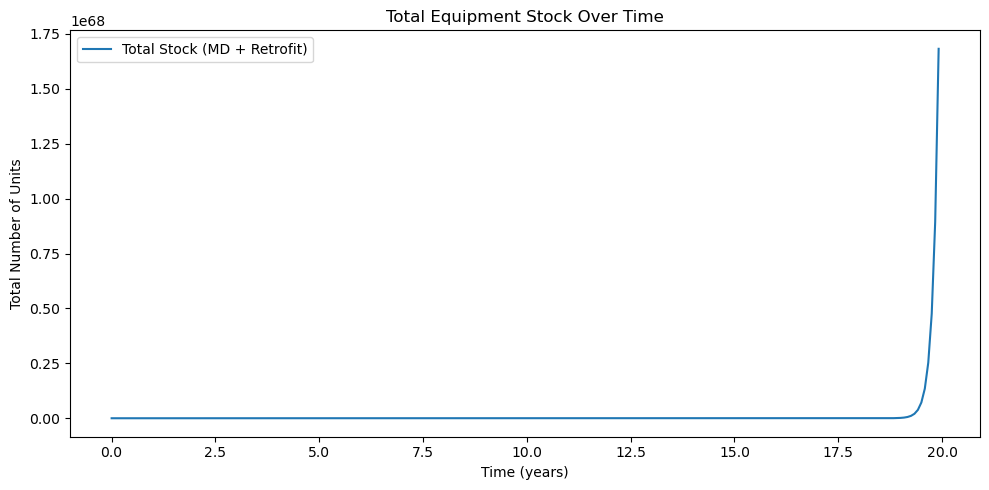

In [67]:
# Equipment Stocks
plt.figure(figsize=(10, 4.5))
plt.plot(time, md_stock, label="Market Driven Stock")
plt.plot(time, ret_stock, label="Retrofit Stock")
plt.plot(time, nc_stock, label="New Construction Stock")
for i in range(0, len(time), 10):
    plt.text(time[i], md_stock[i], f"{md_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], ret_stock[i], f"{ret_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], nc_stock[i], f"{nc_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:green')
plt.xlabel("Time (years)")
plt.ylabel("Number of Units")
plt.title("Equipment Stock Over Time")
plt.legend()
plt.tight_layout()
plt.show()

# New Equipment Flows
plt.figure(figsize=(10, 5))
plt.plot(time, md_inflow_arr, label="Market Driven Inflow")
plt.plot(time, ret_inflow_arr, label="Retrofit Inflow")
plt.plot(time, nc_stock, label="New Construction (External Inflow)")
plt.plot(time, Retirement_Flow_arr, label="Net Flow (MD)")
for i in range(0, len(time), 10):
    plt.text(time[i], md_inflow_arr[i], f"{md_inflow_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], ret_inflow_arr[i], f"{ret_inflow_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], nc_stock[i], f"{nc_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:green')
    plt.text(time[i], Retirement_Flow_arr[i], f"{Retirement_Flow_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:red')
plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("New Equipment Inflows")
plt.legend()
plt.tight_layout()
plt.show()

# Out Equipment Flows
plt.figure(figsize=(10, 5))
plt.plot(time, md_out_arr, label="Market Driven Outflow")
plt.plot(time, ret_out_arr, label="Retrofit Outflow")
plt.plot(time, md_retirement_flow_arr, label="MD Retirement Flow")
plt.plot(time, ret_retirement_flow_arr, label="Retrofit Retirement Flow")
for i in range(0, len(time), 10):
    plt.text(time[i], md_out_arr[i], f"{md_out_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], ret_out_arr[i], f"{ret_out_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], md_retirement_flow_arr[i], f"{md_retirement_flow_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:green')
    plt.text(time[i], ret_retirement_flow_arr[i], f"{ret_retirement_flow_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:red')
plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("Equipment Outflows and Retirements")
plt.legend()
plt.tight_layout()
plt.show()

# Total Stock
plt.figure(figsize=(10, 5))
plt.plot(time, total_stock_arr, label="Total Stock (MD + Retrofit)")
plt.xlabel("Time (years)")
plt.ylabel("Total Number of Units")
plt.title("Total Equipment Stock Over Time")
plt.legend()
plt.tight_layout()
plt.show()